# Case Study 01 Supervised Learning

## Q. Predicting Housing Prices for regions in the USA.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

Predict the price of a hose in USA using Regression

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data loading

In [2]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Inferences:**

* There are 5 features.
* Having no null values.
* All are float type except the address column.

### Data Preprocessing

In [4]:
# Droping address column
df = df.drop(['Address'],axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


#### Handling Outliers

In [5]:
x = df.drop(['Price'],axis=1)
y = df['Price']

In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

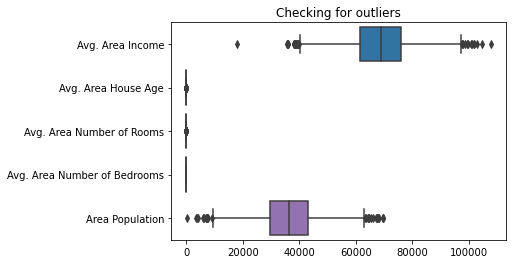

In [7]:
sns.boxplot(data = x,orient = 'h')
plt.title('Checking for outliers')
plt.show()

In [8]:
def outlier_check(data,col):
    X=data[col].copy()
    q3=X.quantile(0.75)
    q1=X.quantile(0.25)
    iqr=q3-q1
    for idx,entry in enumerate(data[col]):
        if (entry>q3+1.5*iqr):
            data.loc[idx,col]=q3+1.5*iqr
        elif (entry<q1-1.5*iqr):
            data.loc[idx,col]=q1-1.5*iqr
    return X[(X>q3+1.5*iqr)|(X<q1-1.5*iqr)]
    
for col in x:
    outlier_check(x,col)

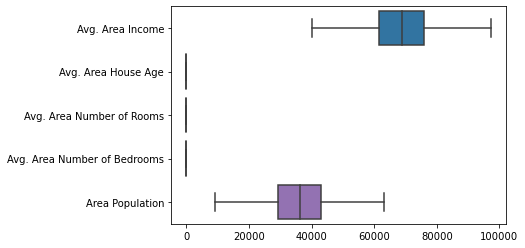

In [9]:
sns.boxplot(data=x,orient='h')
plt.show()

### Splitting of data

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1,random_state=42)

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 3716 to 860
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4500 non-null   float64
 1   Avg. Area House Age           4500 non-null   float64
 2   Avg. Area Number of Rooms     4500 non-null   float64
 3   Avg. Area Number of Bedrooms  4500 non-null   float64
 4   Area Population               4500 non-null   float64
dtypes: float64(5)
memory usage: 210.9 KB


In [12]:
x_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3716,65903.250658,6.616682,7.062269,3.17,45208.387659
3779,50502.094188,7.407850,6.666403,3.17,37593.862491
135,74411.059892,5.534628,7.210123,6.44,43537.502946
4480,71481.034926,5.188492,7.152361,4.32,45246.174103
1437,70795.298849,6.210045,7.582602,3.35,29887.451681


### Scaling of data

In [13]:
num_cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train.loc[:,num_cols] = sc.fit_transform(x_train[num_cols])
x_test.loc[:,num_cols] = sc.fit_transform(x_test[num_cols])

## Model Building

### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

10638843015.23467
0.9156728926598479


In [17]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
8,7.988695e+05,7.719470e+05
12,1.042814e+06,9.934245e+05
23,7.439998e+05,1.262568e+06
26,1.125693e+06,1.079020e+06
29,1.577018e+06,1.724660e+06


## KNN Regressor

In [18]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred_knn))
print(r2_score(y_test,y_pred_knn))

16032430505.483843
0.8729214740528208


In [20]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred_knn)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
8,7.988695e+05,7.897821e+05
12,1.042814e+06,1.049923e+06
23,7.439998e+05,1.290256e+06
26,1.125693e+06,1.139185e+06
29,1.577018e+06,1.645973e+06


## Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=200)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred_rf))
print(r2_score(y_test,y_pred_rf))

14947614212.399149
0.8815200989089542


In [23]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred_rf)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
8,7.988695e+05,8.478226e+05
12,1.042814e+06,9.657947e+05
23,7.439998e+05,1.263994e+06
26,1.125693e+06,1.040311e+06
29,1.577018e+06,1.689651e+06


Note:

* Logisitic regressor is having the r2 score value with 0.91 and is comparitively good model.

##### JIbin K Joy, ML & AI, KKEM Aug 2022 batch